# Visualize pso_meff
Visualize the results of pso_meff (which were stored in the pickle `mydict2.p`).

In [1]:
import pickle

In [2]:
from helpers import get_mass_back

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from collections import defaultdict

In [49]:
with open('mydict2.p', 'rb') as f:
    mydict = pickle.load(f)

In [50]:
zs = 1.0
m_interloper = 1e9

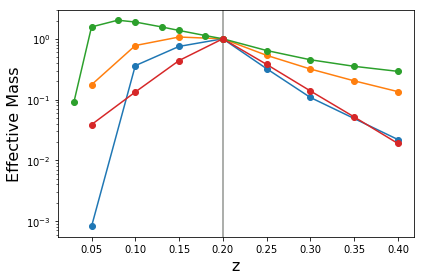

In [55]:
zds_dict = defaultdict(list)
meffs_dict = defaultdict(list)
pfs_dict = defaultdict(list)
for key,pf in sorted(mydict.items()):
    #print('key',key,'val',pf)    
    zd, seed = key
    if zd > .4:
        continue
    
    meff = m_interloper / get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs)
    
    zds_dict[seed].append(zd)
    meffs_dict[seed].append(meff)
    pfs_dict[seed].append(pf)
    
    
plt.axvline(0.2, color='xkcd:grey')

for seed in sorted(zds_dict.keys()):
    plt.plot(zds_dict[seed],
             meffs_dict[seed],
            'o-',
            label='seed %d'%seed)   
plt.gca().set_yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('Effective Mass', fontsize=16)
#plt.legend(fontsize=14)


plt.tight_layout()
plt.savefig('imgs/meffs.png')

In [28]:
from helpers import xi_to_pix, x_to_xi

In [31]:
from pso import PSOFit

In [33]:
pixsize=0.2
pixnum=200
zl=.2
zs = 1.0
fit0 = PSOFit(N=0, zd=zd, zl=zl, zs=zs,numiter=1)
image0 = fit0.pso_img # dumb hacky way to generate smooth-model image

2019-12-03 02:21:32,632 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'w': 0.9, 'c1': 0.5, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=8.73e-22
2019-12-03 02:21:34,080 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.726744055505752e-22, best pos: [-0.3308262  -3.78784139]


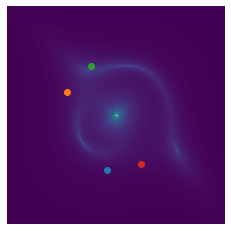

In [48]:
fig = plt.imshow(image0)
for seed in sorted(zds_dict.keys()):
    
    xpix = xi_to_pix(x_to_xi(pfs_dict[seed][0].almost_truth_args[2], zl),zl,pixsize,pixnum)
    ypix = xi_to_pix(x_to_xi(pfs_dict[seed][0].almost_truth_args[3], zl),zl,pixsize,pixnum)
    plt.scatter([xpix],[ypix], label='seed %d'%seed)
    
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
#plt.gca().set_axis_off()
#plt.legend()
#plt.scatter([ypix],[xpix])
#plt.tight_layout()
plt.savefig("imgs/locations.png", bbox_inches='tight',pad_inches = 0)